## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist
* Network Intrusion Detection using Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

## Iris

It is the normal iris dataset.

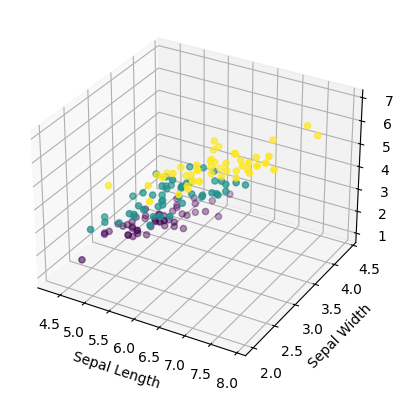

In [37]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [38]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Decision trees with depth = ?

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

In [43]:
# Create a list of max_depth values to test
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Create an empty list to store the accuracy scores
accuracies = []

# Loop through the max_depths list and train a model for each depth, then store the accuracy
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [44]:
accuracies

[0.6666666666666666,
 0.8888888888888888,
 0.9777777777777777,
 0.9333333333333333,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9111111111111111,
 0.9777777777777777]

In [45]:
accuracies.index(max(accuracies))

2

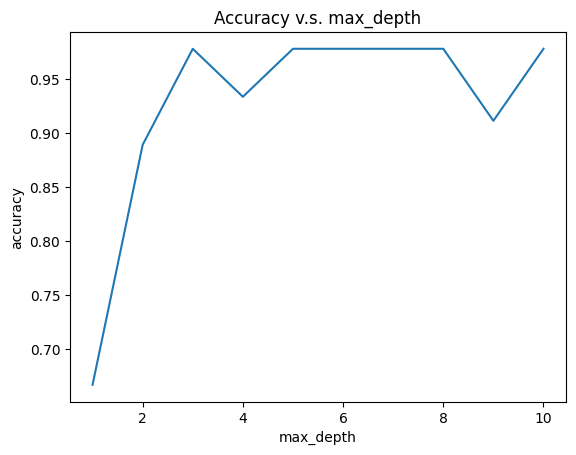

Best max_depth: 3


In [46]:
# Plot the accuracy scores for the different max_depth values
plt.plot(max_depths, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy v.s. max_depth')
plt.show()

# Choose the max_depth value that gives the highest accuracy on the testing data
best_max_depth = max_depths[accuracies.index(max(accuracies))]
print('Best max_depth:', best_max_depth)

### Question #2:

Predict the testing data. What is your accuracy_score?

In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score
dt = DecisionTreeClassifier(max_depth=best_max_depth)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9333333333333333


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(X)

[0.92461872 0.05306648]


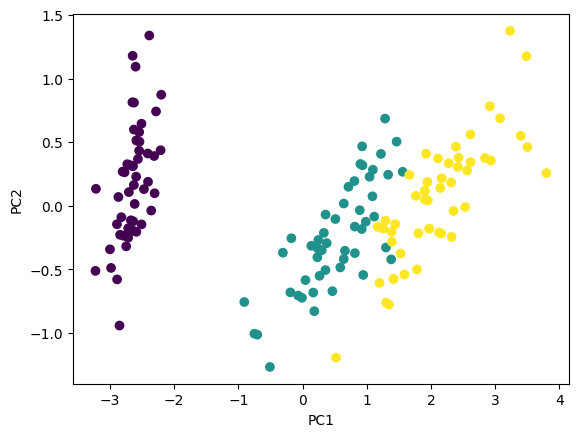

In [60]:
# Plotting the results of PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result?

In [61]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9777777777777777


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.

accuracy從0.88889變成0.977778，變好的原因是因為通過PCA將數據集的維度降低到僅包含最重要的主成分，可以消除可能存在於原始數據集中的noice和redundant information，使決策樹可以對新的、未見過的數據做出更準確的預測。


### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

1. 使用feature engineering:可以找出分類任務中最重要的幾個特徵，幫助decision tree的準確性。
2. 嘗試使用Normalization、standardization or scaling，以查看它們是否可以提高模型的準確性。

## MNIST

Let's look at a famous handwritten numbers dataset.

In [63]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

digi_X 有1797個samples, 每個sample有8*8個pixels

In [68]:
digi_X.shape

(1797, 64)

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

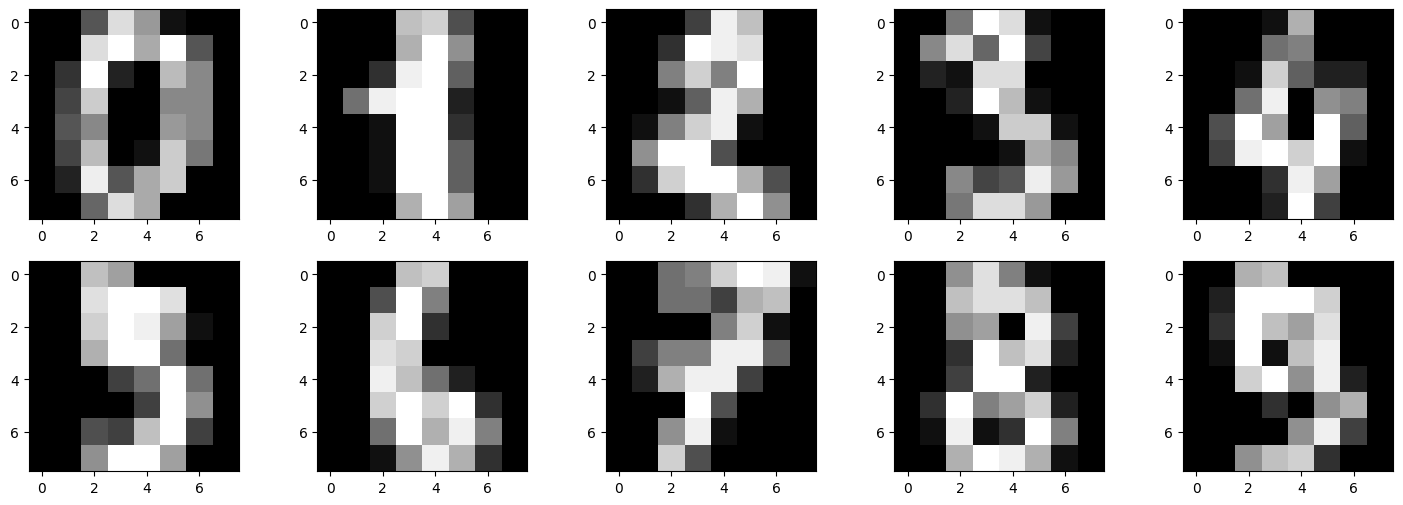

In [82]:
plt.figure(figsize=(18, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

In [83]:
pca = decomposition.PCA(n_components=2)
pca.fit(digi_X)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(digi_X)

[0.14890594 0.13618771]


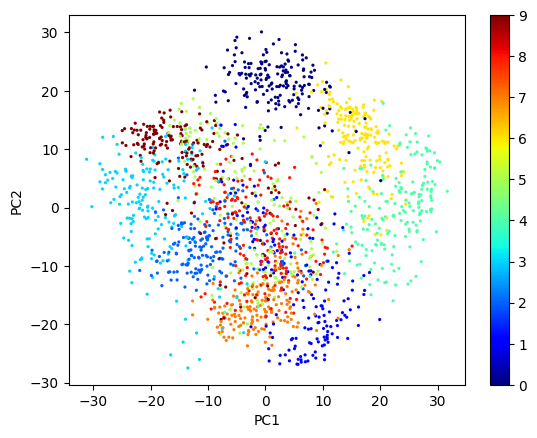

In [94]:
# Plotting the results of PCA
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digi_y, cmap='jet', s=5, linewidth=0.05)
cbar = plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Question #8:

Why the figure looks bad? How many components would be better?

由下圖可知，MNIST在只有兩維度時，無法很好分類，因為variance只有約0.2。

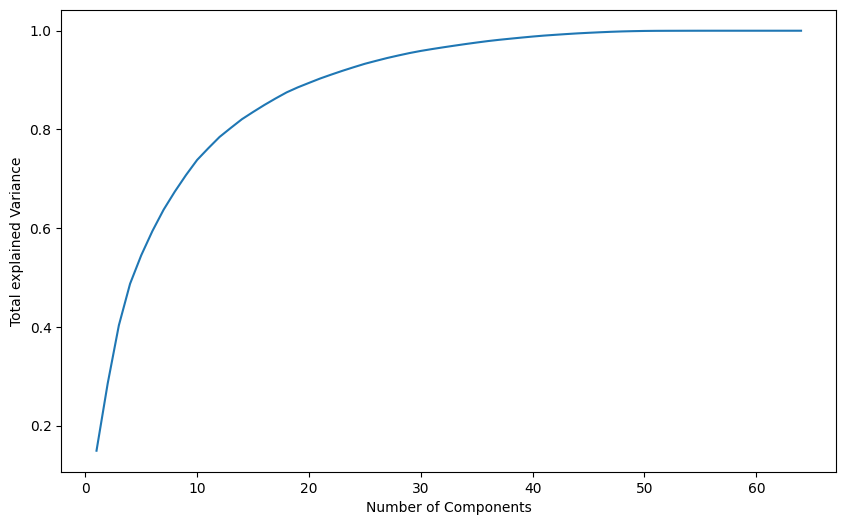

The variance = 0.2850936482369796 when reducing the MNIST data to 2-dimension


In [108]:
# hint: take a look at pca.explained_variance_ratio_
n_components_range = list(range(1, len(digi_X[0])+1))
cumulative_explained_variance_ratios = []

for i in n_components_range:
  pca = decomposition.PCA(i)
  pca.fit(digi_X)
  cumulative_explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
  cumulative_explained_variance_ratios.append(cumulative_explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cumulative_explained_variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Total explained Variance')
plt.show()
print(f'The variance = {cumulative_explained_variance_ratios[1]} when reducing the MNIST data to 2-dimension')

In [109]:
for i, ratio in enumerate(cumulative_explained_variance_ratios):
  print(i, ratio)

0 0.14890593584062392
1 0.2850936482369796
2 0.40303958587671945
3 0.48713938008235497
4 0.5449635266544577
5 0.5941326298224382
6 0.6372923481024397
7 0.6739051262765452
8 0.7074385653505745
9 0.7382258071705546
10 0.7619487162452061
11 0.7846741709373172
12 0.8028939286898436
13 0.8206317742851399
14 0.8353026654721672
15 0.8494002060530131
16 0.8625854280332835
17 0.8750667355796241
18 0.8852447963276061
19 0.8942857452932791
20 0.9031872629744474
21 0.9111649972777224
22 0.9188415434210211
23 0.9260675047842029
24 0.9330301152771168
25 0.9389871426260141
26 0.9447474797710443
27 0.949898241800045
28 0.9547908920582416
29 0.9590804490622514
30 0.9628183143653352
31 0.9663526264113615
32 0.9697184930365045
33 0.9730009838292634
34 0.9760843014746413
35 0.979022045803583
36 0.9815880651771751
37 0.9838656285490268
38 0.9860884277528014
39 0.9882027336462335
40 0.9901018242795534
41 0.9916883533457255
42 0.993199952690392
43 0.9946057403272028
44 0.995771963230503
45 0.9968468884415465

In [110]:
threshold_95 = 0.95
n_components_95 = None
for i, ratio in enumerate(cumulative_explained_variance_ratios):
  if n_components_95 is None and ratio >= threshold_95:
    n_components_95 = i + 1
  if n_components_95 is not None:
    break
print(f"Number of components: {n_components_95}")

Number of components: 29


### Bonus #1:

(Extra points will be awarded.)

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

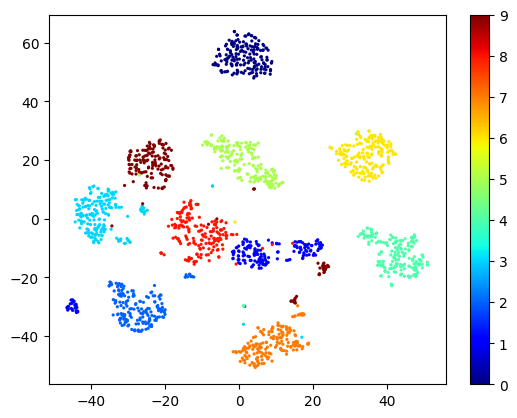

In [111]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE
# Perform t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_reduced = tsne.fit_transform(digi_X)

# Plot the 2D data with labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digi_y, cmap='jet', s=5, linewidth=0.05)
plt.colorbar(scatter)
plt.show()

## Bonus: Network Intrusion Detection using Python

(Extra points will be awarded.)

You have tried NID before. Could you do a better acc rate(by using any techniques you have learned) ?

https://www.kaggle.com/code/sampadab17/network-intrusion-detection-using-python/data

#### Bonus #10:

Show you result of NID.

In [112]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/資料安全的資訊科學/NID_dataset"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/資料安全的資訊科學/NID_dataset


In [113]:
train_data=pd.read_csv('Train_data.csv', )
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [114]:
test_data=pd.read_csv('Test_data.csv', )
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [119]:
train_data['class'].dtypes

dtype('O')

In [120]:
from sklearn.preprocessing import LabelEncoder

# Convert class labels to integers
le = LabelEncoder()
train_data['class'] = le.fit_transform(train_data['class'])

In [121]:
train_data['class'].dtypes

dtype('int64')

In [124]:
train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [125]:
train_data['protocol_type'] = le.fit_transform(train_data['protocol_type'])
train_data['service'] = le.fit_transform(train_data['service'])
train_data['flag'] = le.fit_transform(train_data['flag'])

In [128]:
NID_X = train_data.drop('class', axis=1)
NID_X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [132]:
NID_y = train_data['class']
NID_y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int64

In [129]:
# Perform t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_reduced = tsne.fit_transform(NID_X)

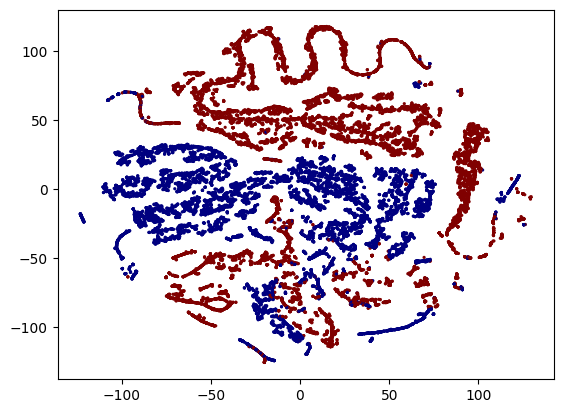

In [138]:
# Plot the 2D data with labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=NID_y, cmap='jet', s=5, linewidth=0.05)
plt.show()

In [134]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_reduced, NID_y, test_size=0.3, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9822704419158508


#### Bonus #11:

Plot a single 2-d figure with clusters of NID labeled training data and non-labeled testing data. Note that testing data has no target and it is in another csv file. (Maybe you can use 'star' symbol to represet non-labeled testing data to make the figure clear to understand.)

In [141]:
test_data['protocol_type'] = le.fit_transform(test_data['protocol_type'])
test_data['service'] = le.fit_transform(test_data['service'])
test_data['flag'] = le.fit_transform(test_data['flag'])
NID_X_test = test_data
NID_X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,22,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,11,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [143]:
# Perform t-SNE to reduce data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
test_X_reduced = tsne.fit_transform(NID_X_test)

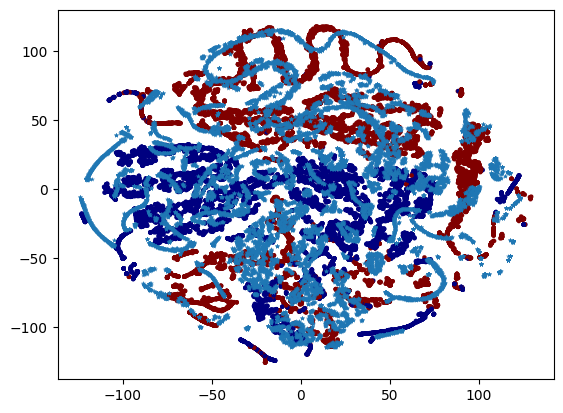

In [147]:
# Plot the 2D data with labels
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=NID_y, cmap='jet', s=10, linewidth=0.1)
plt.scatter(test_X_reduced[:, 0], test_X_reduced[:, 1], marker='*', s=10, linewidth=0.1)
plt.show()